# Task-2. Simple Linear Regression

Importing relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

Importing data from the link

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Dividing the data into input and output format 

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values  

Plotting our data into a 2-D graph to visualise it manually.

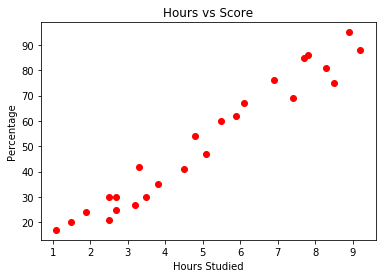

In [4]:
plt.scatter(X, y, color = 'red')
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage')  
plt.show()

Checking co-relation between the input and output of the data by using a heatmap

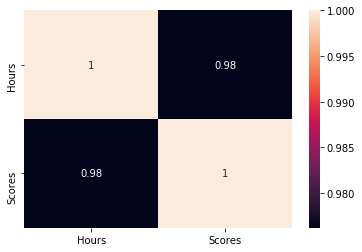

In [5]:
sb.heatmap(data.corr() , annot = True)

It is evident from the above graph that there is a strong positive linear relation (98 % ) between the number of hours studied and the 
score.

Splitting the dataset into the Training set and Test set


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the algorithm

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Comparing the predicted Score with actual Score

In [8]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df 

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Visualising the Training set results

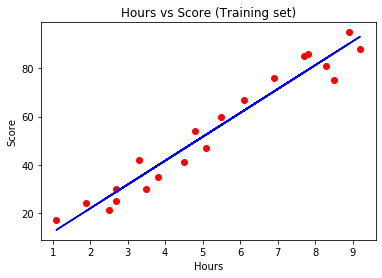

In [9]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

Visualising the Test set results

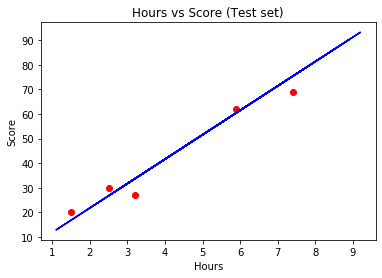

In [10]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

Testing new data

In [11]:
no_of_hours = 9.25
predictor = regressor.predict(np.array([9.25]).reshape(1, 1))
print("No of Hours = {}".format(no_of_hours))
print("Predicted Score = {}".format(predictor[0]))
plt.show()

No of Hours = 9.25
Predicted Score = 93.69173248737538


Evaluating the model using mean square error.

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
